In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
file_path=r"C:\Users\DELL\Desktop\Projects\Flight_Price_Predictor\data\train.csv"
train=pd.read_csv(file_path)

In [5]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [6]:
train=train.assign(**{
    col: pd.to_datetime(train.loc[:,col],dayfirst=True,format="mixed")
    for col in ['date_of_journey', 'dep_time', 'arrival_time']
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [8]:
train=train.dropna()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6694 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6694 non-null   object        
 1   date_of_journey  6694 non-null   datetime64[ns]
 2   source           6694 non-null   object        
 3   destination      6694 non-null   object        
 4   dep_time         6694 non-null   datetime64[ns]
 5   arrival_time     6694 non-null   datetime64[ns]
 6   duration         6694 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6694 non-null   object        
 9   price            6694 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 575.3+ KB


In [10]:
train.describe(include="number")

,duration,total_stops,price
count,6694.000000,6694.000000,6694.000000
mean,633.371676,0.801464,9031.197341
std,502.951999,0.659737,4639.830703
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,920.000000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [11]:
(
    train
    .assign(total_stops=train['total_stops'].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,6694,6694,6694,6694.0,6694
unique,9,5,6,4.0,7
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2391,2729,2729,3580.0,5248


In [12]:
from sklearn.ensemble import IsolationForest

In [13]:
forest=IsolationForest(n_estimators=10,random_state=42)

In [14]:
(
    train
    .assign(outlier=forest.fit_predict(
        train
        .drop(columns='price')
        .select_dtypes(include='number')
    ))
    .query("outlier==-1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
5,Jet Airways,2019-04-21,Banglore,Delhi,2024-08-16 18:55:00,2024-08-16 22:00:00,185,0.0,In-flight meal not included,4544,-1
7,Spicejet,2019-06-15,Mumbai,Hyderabad,2024-08-16 05:45:00,2024-08-16 07:15:00,90,0.0,No check-in baggage included,2647,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2024-08-16 23:05:00,2024-08-16 04:25:00,1760,2.0,No Info,15129,-1
10,Jet Airways,2019-06-12,Kolkata,Banglore,2024-08-16 14:05:00,2024-08-16 10:05:00,1200,1.0,No Info,13044,-1
12,Jet Airways,2019-06-24,Delhi,Cochin,2024-08-16 21:25:00,2024-08-16 19:00:00,1295,2.0,No Info,13292,-1
...,...,...,...,...,...,...,...,...,...,...,...
6687,Air India,2019-06-06,Kolkata,Banglore,2024-08-16 05:50:00,2024-08-16 08:55:00,1625,2.0,No Info,12723,-1
6688,Jet Airways,2019-06-15,Delhi,Cochin,2024-08-16 21:25:00,2024-08-16 12:35:00,910,2.0,In-flight meal not included,9905,-1
6689,Indigo,2019-03-03,Mumbai,Hyderabad,2024-08-16 09:10:00,2024-08-16 10:40:00,90,0.0,No Info,5755,-1
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-08-16 10:45:00,2024-08-16 18:50:00,1925,2.0,No Info,11093,-1


In [15]:
from IPython.display import display, HTML

In [16]:
# pair plots
def display_html(size=3, content="content"):
  display(HTML(f"<h{size}>{content}</h{size}>"))
def pair_plots(data,
               height=3,
               aspect=1.5,
               hue=None,
               legend=False):
  display_html(2, "Pair Plots")

  pair_grid = sns.PairGrid(
      data=data,
      aspect=aspect,
      height=height,
      hue=hue,
      corner=True
  )
  pair_grid.map_lower(sns.scatterplot)

  if legend:
    pair_grid.add_legend()

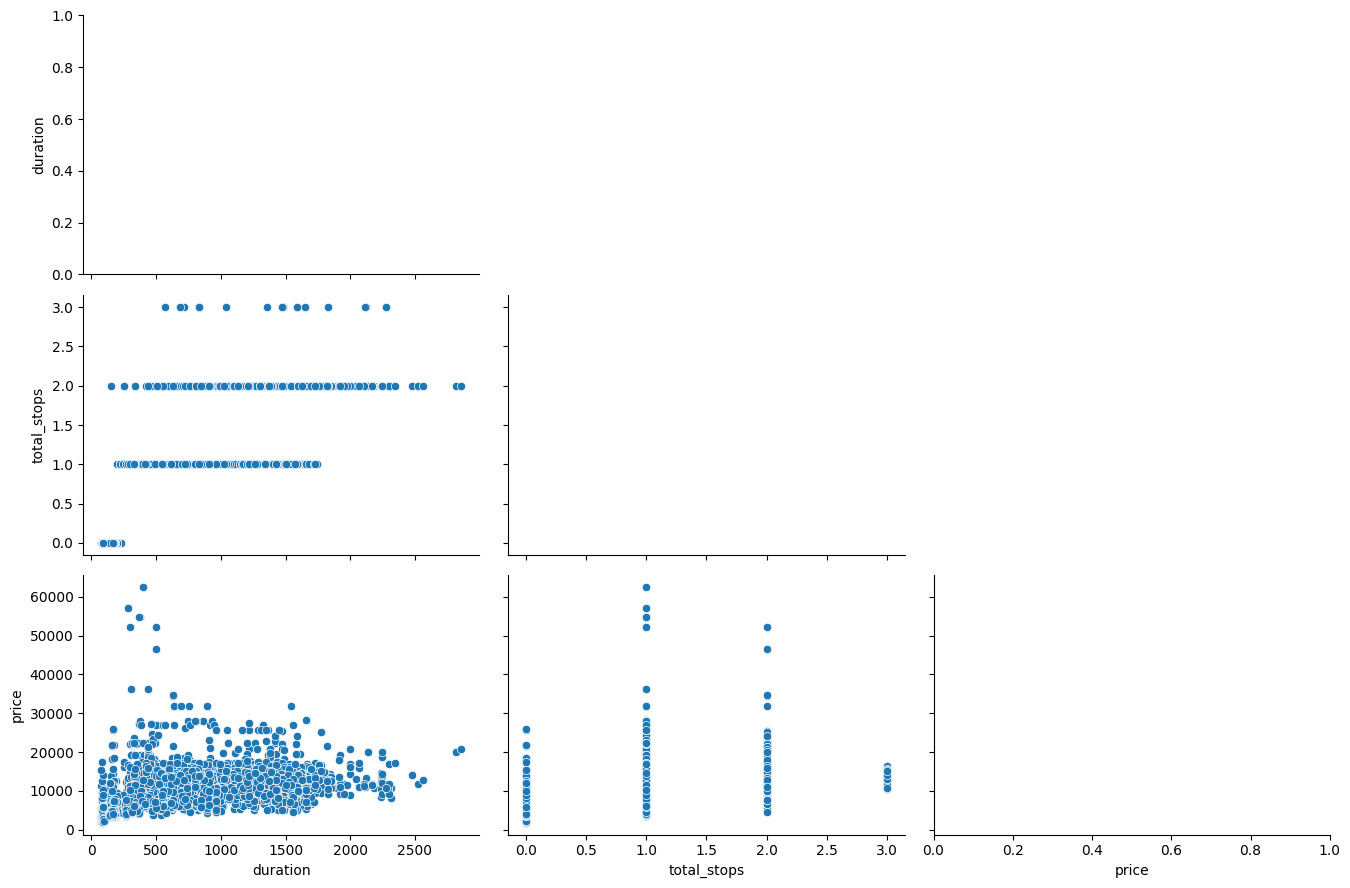

In [17]:
pair_plots(train)

In [18]:
def rotate_xlabels(ax, angle=35):
  ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=angle,
        ha="right"
    )
  

def rotate_ylabels(ax, angle=0):
  ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=angle
  )
def correlation_heatmap(data,
                        figsize=(12, 6),
                        method="spearman",
                        cmap="RdBu"):
  cm = data.corr(method=method, numeric_only=True)

  mask = np.zeros_like(cm, dtype=bool)
  mask[np.triu_indices_from(mask)] = True

  fig, ax = plt.subplots(figsize=figsize)
  hm = sns.heatmap(
      cm,
      vmin=-1,
      vmax=1,
      cmap=cmap,
      center=0,
      annot=True,
      fmt=".2f",
      linewidths=1.5,
      square=True,
      mask=mask,
      ax=ax
  )
  rotate_xlabels(ax)
  rotate_ylabels(ax)
  ax.set(title=f"{method.title()} Correlation Matrix Heatmap")

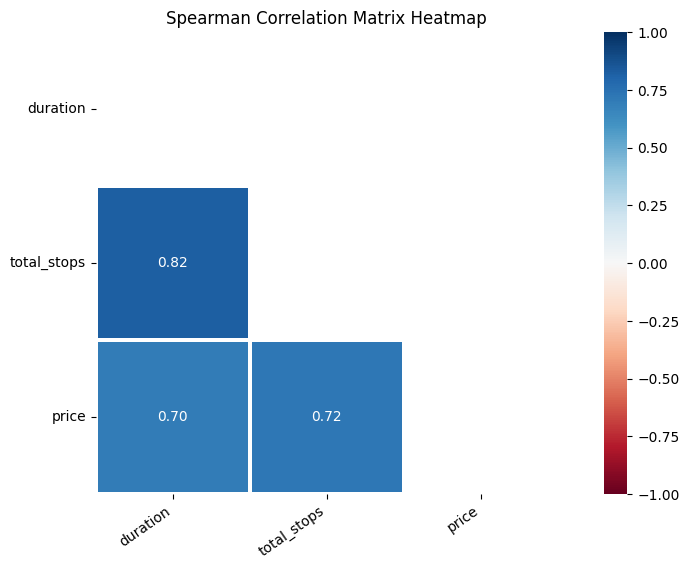

In [19]:
correlation_heatmap(train)

In [20]:
from scipy import stats
import statsmodels.api as sm

In [21]:
def cramers_v(data, var1, var2):
  ct = pd.crosstab(
      data.loc[:, var1],
      data.loc[:, var2]
  )
  r, c = ct.shape
  n = ct.sum().sum()
  chi2 = stats.chi2_contingency(ct).statistic
  phi2 = chi2 / n

  # bias correction
  phi2_ = max(0, phi2 - ((r - 1) * (c - 1) / (n - 1)))
  r_ = r - (((r - 1) ** 2) / (n - 1))
  c_ = c - (((c - 1) ** 2) / (n - 1))

  return np.sqrt(phi2_ / min(r_ - 1, c_ - 1))


def cramersV_heatmap(data, figsize=(12, 6), cmap="Blues"):
  cols = data.select_dtypes(include="O").columns.to_list()

  matrix = (
      pd
      .DataFrame(data=np.ones((len(cols), len(cols))))
      .set_axis(cols, axis=0)
      .set_axis(cols, axis=1)
  )

  for col1 in cols:
    for col2 in cols:
      if col1 != col2:
        matrix.loc[col1, col2] = cramers_v(data, col1, col2)

  mask = np.zeros_like(matrix, dtype=bool)
  mask[np.triu_indices_from(mask)] = True
  
  fig, ax = plt.subplots(figsize=figsize)
  hm = sns.heatmap(
      matrix,
      vmin=0,
      vmax=1,
      cmap=cmap,
      annot=True,
      fmt=".2f",
      square=True,
      linewidths=1.5,
      mask=mask,
      ax=ax
  )
  ax.set(title="Cramer's V Correlation Matrix Heatmap")
  rotate_xlabels(ax)
  rotate_ylabels(ax)

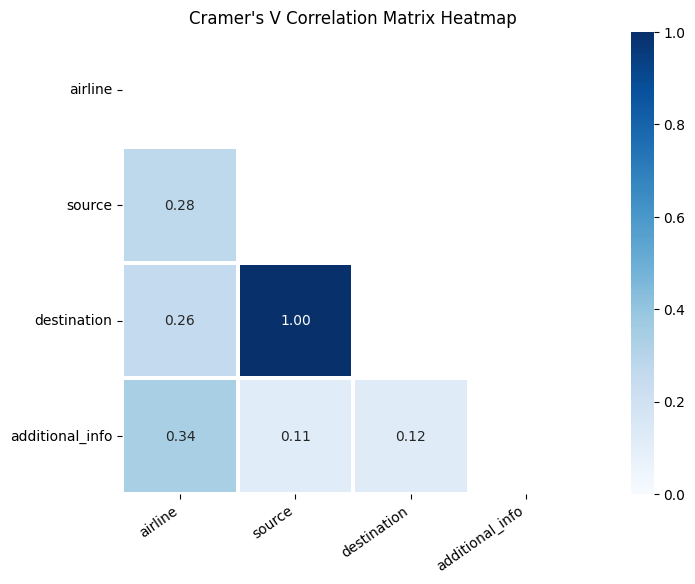

In [22]:
cramersV_heatmap(train)

In [23]:
train["destination"].unique()

array(['New Delhi', 'Cochin', 'Banglore', 'Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

# detailed analysis of each feature

## airline

In [26]:
train.airline

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6694, dtype: object

In [27]:
def cat_summary(data, var):
  import warnings
  warnings.filterwarnings("ignore")

  # title
  col = data.loc[:, var].copy()
  display_html(2, var)

  # quick glance
  display_html(3, "Quick Glance:")
  display(col)

  # meta-data
  display_html(3, "Meta-data:")
  print(f"{'Data Type':15}: {col.dtype}")
  print(f"{'Cardinality':15}: {col.nunique(dropna=True)} categories")
  print(f"{'Missing Data':15}: {col.isna().sum():,} rows ({col.isna().mean() * 100:.2f} %)")
  print(f"{'Available Data':15}: {col.count():,} / {len(col):,} rows")

  # summary
  display_html(3, "Summary:")
  display(
      col
      .describe()
      .rename("")
      .to_frame()
  )

  # categories
  display_html(3, "Categories Distribution:")
  with pd.option_context("display.max_rows", None):
    display(
        col
        .value_counts()
        .pipe(lambda ser: pd.concat(
            [
                ser,
                col.value_counts(normalize=True)
            ],
            axis=1
        ))
        .set_axis(["count", "percentage"], axis=1)
        .rename_axis(index="category")
    )


In [28]:
cat_summary(train,"airline")

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,9
top,Jet Airways
freq,2391


,count,percentage
category,,
Jet Airways,2391,0.357186
Indigo,1296,0.193606
Air India,1075,0.160592
Multiple Carriers,736,0.109949
Spicejet,537,0.080221
Vistara,322,0.048103
Air Asia,211,0.031521
Goair,125,0.018673
Trujet,1,0.000149


In [29]:
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud, STOPWORDS
def get_top_k(data, var, k):
  col = data.loc[:, var].copy()
  cardinality = col.nunique(dropna=True)
  if k >= cardinality:
    raise ValueError(f"Cardinality of {var} is {cardinality}. K must be less than {cardinality}.")
  else:
    top_categories = (
        col
        .value_counts(dropna=True)
        .index[:k]
    )
    data = data.assign(**{
        var: np.where(
            col.isin(top_categories),
            col,
            "Other"
        )
    })
    return data
  


In [30]:
def pie_chart(counts, colors, ax):
  pie = ax.pie(
        counts.values,
        labels=counts.index,
        autopct="%.2f%%",
        colors=colors,
        wedgeprops=dict(alpha=0.7, edgecolor="black"),
  )

  ax.set_title("Pie Chart")

  ax.legend(
      loc="upper left",
      bbox_to_anchor=(1.02, 1),
      title="Categories",
      title_fontproperties=dict(weight="bold", size=10)
  )

  plt.setp(
      pie[2],
      weight="bold",
      color="white"
  )

In [31]:
def bar_chart(counts, colors, ax):
  barplot = ax.bar(
        x=range(len(counts)),
        height=counts.values,
        tick_label=counts.index,
        color=colors,
        edgecolor="black",
        alpha=0.7
  )

  ax.bar_label(
      barplot,
      padding=5,
      color="black"
  )

  ax.set(
      title="Bar Chart",
      xlabel="Categories",
      ylabel="Count"
  )

  ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation=45,
      ha="right"
  )


In [32]:
def cat_univar_plots(data,
                     var,
                     k=None,
                     order=None,
                     show_wordcloud=True,
                     figsize=(12, 8.5)):
  display_html(2, f"Univariate Analysis of {var}")
  display_html(content="")

  fig = plt.figure(figsize=figsize)
  gs = GridSpec(2, 2, figure=fig)
  ax1 = fig.add_subplot(gs[0, 0]) # bar-chart
  ax2 = fig.add_subplot(gs[0, 1]) # pie-chart
  ax3 = fig.add_subplot(gs[1, :]) # word-cloud

  if k is None:
    counts = (
        data
        .loc[:, var]
        .value_counts()
        .reindex(index=order)
    )
  else:
    temp = get_top_k(
        data,
        var,
        k=k
    )
    counts = (
        temp
        .loc[:, var]
        .value_counts()
    )

  colors = [tuple(np.random.choice(256, size=3) / 255) for _ in range(len(counts))]

  # bar-chart
  bar_chart(
      counts,
      colors,
      ax1
  )

  # pie_chart
  pie_chart(
      counts,
      colors,
      ax2
  )

  # word-cloud
  if show_wordcloud:
    var_string = " ".join(
        data
        .loc[:, var]
        .dropna()
        .str.replace(" ", "_")
        .to_list()
    )

    word_cloud = WordCloud(
        width=2000,
        height=700,
        random_state=42,
        background_color="black",
        colormap="Set2",
        stopwords=STOPWORDS
    ).generate(var_string)

    ax3.imshow(word_cloud)
    ax3.axis("off")
    ax3.set_title("Word Cloud")
  else:
    ax3.remove()

  plt.tight_layout()
  plt.show()

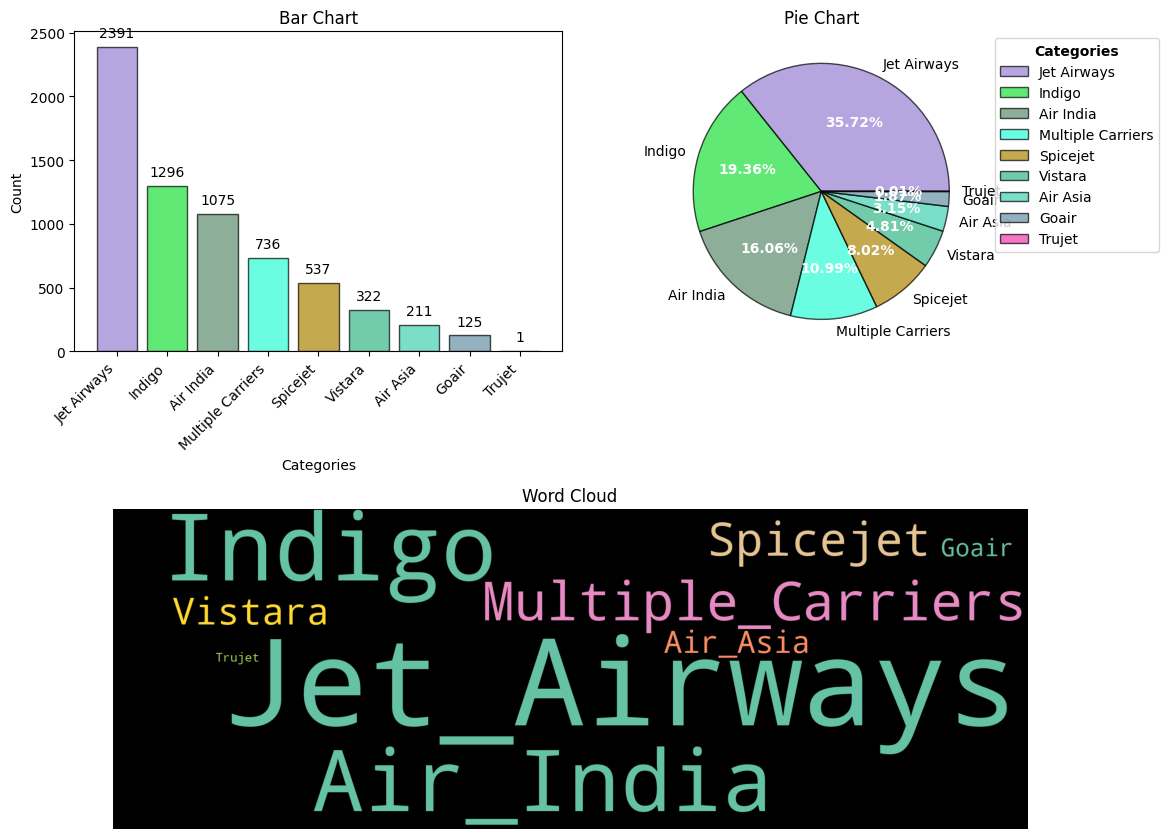

In [35]:
cat_univar_plots(train,"airline")

In [36]:
def num_cat_bivar_plots(data,
                        num_var,
                        cat_var,
                        k=None,
                        estimator="mean",
                        orient="v",
                        order=None,
                        figsize=(15, 4)):

  def get_values(data,
                 num_var,
                 cat_var,
                 estimator,
                 order=None):
    return (
        data
        .groupby(cat_var)
        .agg(estimator, numeric_only=True)
        .loc[:, num_var]
        .dropna()
        .sort_values()
        .reindex(index=order)
    )

  import warnings
  warnings.filterwarnings("ignore")

  display_html(2, f"Bi-variate Analysis between {cat_var} and {num_var}")
  display_html(content="")

  if k is None:
    temp = get_values(
        data,
        num_var,
        cat_var,
        estimator,
        order=order
    )
  else:
    data = get_top_k(
        data,
        cat_var,
        k=k
    )
    temp = get_values(
        data,
        num_var,
        cat_var,
        estimator
    )

  if orient == "v":
    fig, axes = plt.subplots(1, 3, figsize=figsize)

    # bar plot
    bar = sns.barplot(
      x=temp.index,
      y=temp.values,
      color="#d92b2b",
      ax=axes[0],
      edgecolor="black",
      alpha=0.5
    )
    axes[0].set(
        title="Bar Plot",
        xlabel=cat_var,
        ylabel=num_var
    )
    rotate_xlabels(axes[0])

    # box plot
    sns.boxplot(
      data,
      x=cat_var,
      y=num_var,
      color="lightgreen",
      order=temp.index,
      ax=axes[1]
    )
    axes[1].set(
        title="Box Plot",
        xlabel=cat_var,
        ylabel=""
    )
    rotate_xlabels(axes[1])

    # violin plot
    sns.violinplot(
      data,
      x=cat_var,
      y=num_var,
      color="#0630c9",
      order=temp.index,
      ax=axes[2],
      alpha=0.5
    )
    axes[2].set(
        title="Violin Plot",
        xlabel=cat_var,
        ylabel=""
    )
    rotate_xlabels(axes[2])
  else:
    fig, axes = plt.subplots(3, 1, figsize=figsize)

    # bar plot
    bar = sns.barplot(
      y=temp.index,
      x=temp.values,
      color="#d92b2b",
      ax=axes[0],
      edgecolor="black",
      alpha=0.5
    )
    axes[0].set(
        title="Bar Plot",
        xlabel="",
        ylabel=cat_var
    )

    # box plot
    sns.boxplot(
      data,
      y=cat_var,
      x=num_var,
      color="lightgreen",
      order=temp.index,
      ax=axes[1]
    )
    axes[1].set(
        title="Box Plot",
        xlabel="",
        ylabel=cat_var
    )

    # violin plot
    sns.violinplot(
      data,
      y=cat_var,
      x=num_var,
      color="#0630c9",
      order=temp.index,
      ax=axes[2],
      alpha=0.5
    )
    axes[2].set(
        title="Violin Plot",
        xlabel=num_var,
        ylabel=cat_var
    )

  plt.tight_layout()
  plt.show()


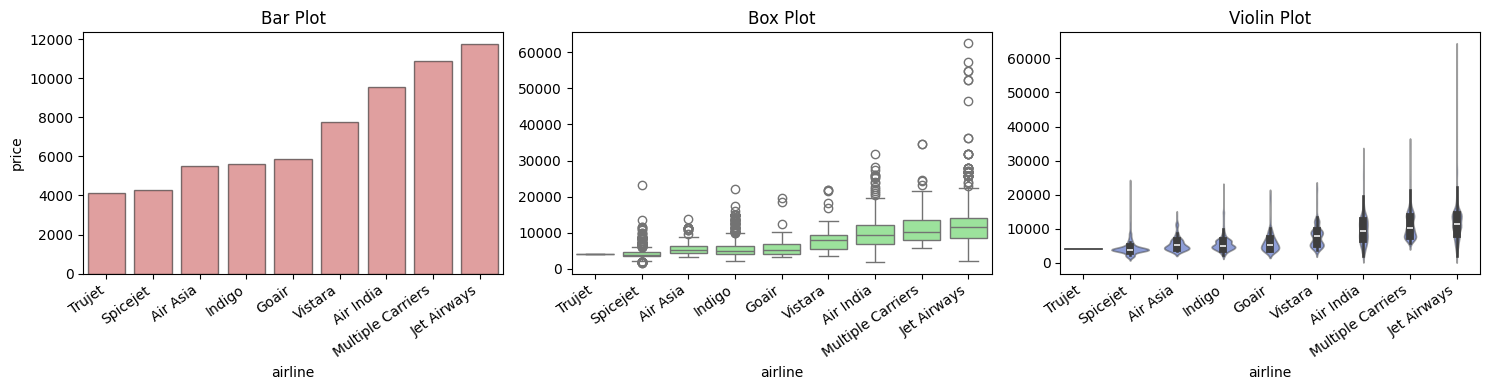

In [37]:
num_cat_bivar_plots(train,num_var="price",cat_var="airline")

In [38]:
def num_cat_hyp_testing(data, num_var, cat_var, alpha=0.05):
  display_html(2, f"Hypothesis Test for Association between {num_var} and {cat_var}")

  groups_df = (
      data
      .dropna(subset=[num_var])
      .groupby(cat_var)
  )
  groups = [group[num_var].values for _, group in groups_df]

  # anova test
  anova = stats.f_oneway(*groups)
  statistic = anova[0]
  pvalue = anova[1]
  display_html(3, "ANOVA Test")
  print(f"- {'Significance Level':21}: {alpha * 100}%")
  print(f"- {'Null Hypothesis':21}: The groups have similar population mean")
  print(f"- {'Alternate Hypothesis':21}: The groups don't have similar population mean")
  print(f"- {'Test Statistic':21}: {statistic}")
  print(f"- {'p-value':21}: {pvalue}")
  if pvalue < alpha:
    print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {num_var} and {cat_var} are associated to each other")
  else:
    print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {num_var} and {cat_var} are not associated to each other")

  # kruskal-wallis test
  kruskal = stats.kruskal(*groups)
  statistic = kruskal[0]
  pvalue = kruskal[1]
  display_html(3, "Kruskal-Wallis Test")
  print(f"- {'Significance Level':21}: {alpha * 100}%")
  print(f"- {'Null Hypothesis':21}: The groups have similar population median")
  print(f"- {'Alternate Hypothesis':21}: The groups don't have similar population median")
  print(f"- {'Test Statistic':21}: {statistic}")
  print(f"- {'p-value':21}: {pvalue}")
  if pvalue < alpha:
    print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {num_var} and {cat_var} are associated to each other")
  else:
    print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {num_var} and {cat_var} are not associated to each other")

  
#univariate plots for categorical variables
#helper functions

In [39]:
num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 473.2504388077414
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3130.947388921903
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


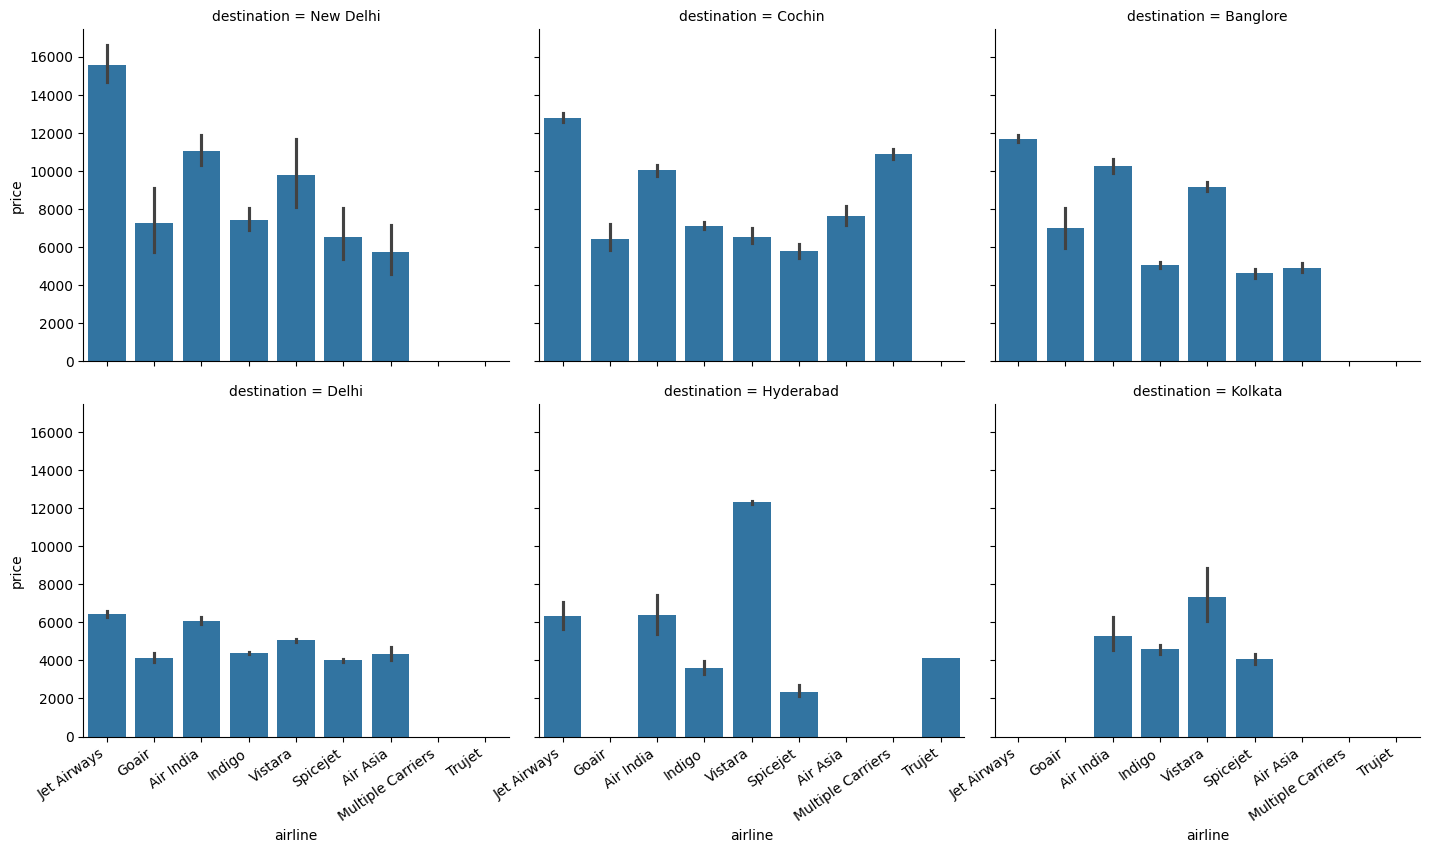

In [43]:
airline_grid=sns.FacetGrid(data=train,col="destination",col_wrap=3,sharey=True,height=4,aspect=1.2)
airline_grid.map(sns.barplot,"airline","price")
for ax in airline_grid.axes[3:]:
    rotate_xlabels(ax)

## date of journey

In [44]:
def dt_univar_plots(data, var, target=None, bins="auto"):
  display_html(3, f"Univariate plots of {var}")
  col = data.loc[:, var].copy()

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

  # histogram
  sns.histplot(
    data=data,
    x=var,
    bins=bins,
    color="#1973bd",
    ax=ax1
  )
  sns.rugplot(
    data=data,
    x=var,
    color="darkblue",
    height=0.035,
    ax=ax1
  )
  ax1.set(title="Histogram")
  rotate_xlabels(ax1)

  # line-plot
  sns.lineplot(
    data=data,
    x=var,
    y=target,
    color="#d92b2b",
    ax=ax2
  )
  rotate_xlabels(ax2)
  ax2.set(title="Line Plot")

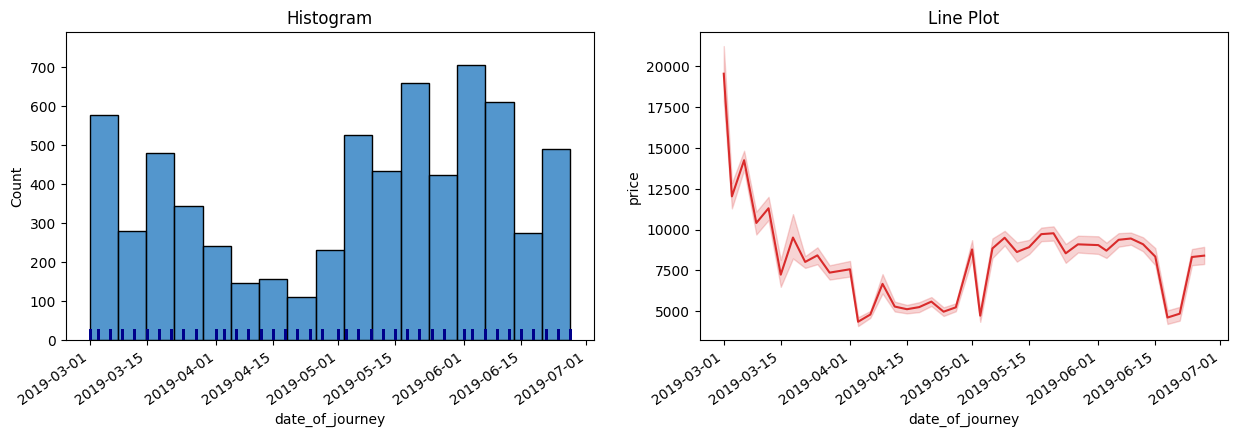

In [45]:
dt_univar_plots(train,"date_of_journey","price")

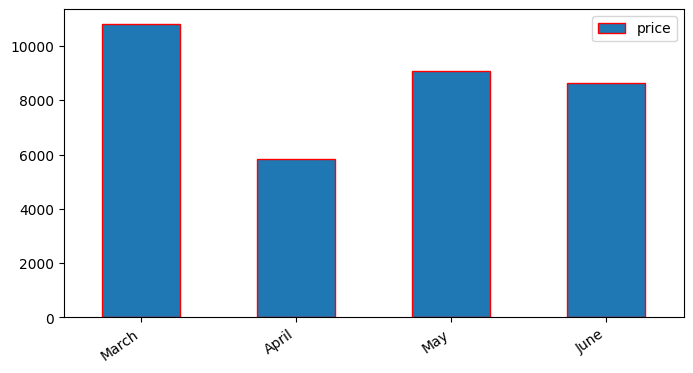

In [54]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June"])
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="red"
    )
)
ax=plt.gca()
rotate_xlabels(ax)

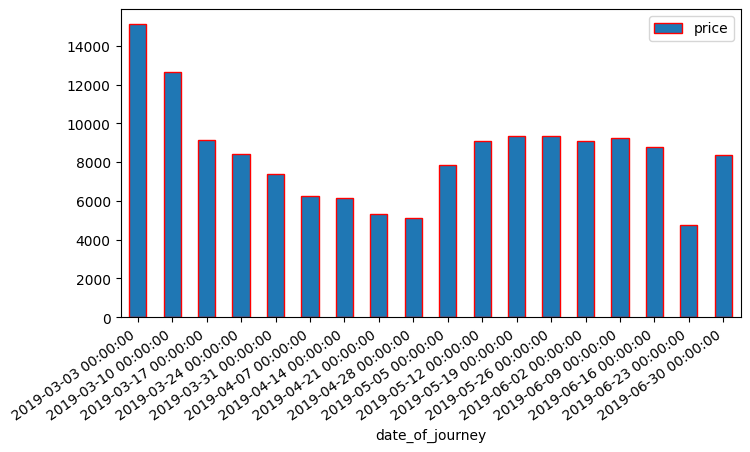

In [57]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq="W"))
    .price.mean()
    .to_frame()
    #.set_axis(["March", "April", "May", "June"])
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="red"
    )
)
ax=plt.gca()
rotate_xlabels(ax)

<Axes: >

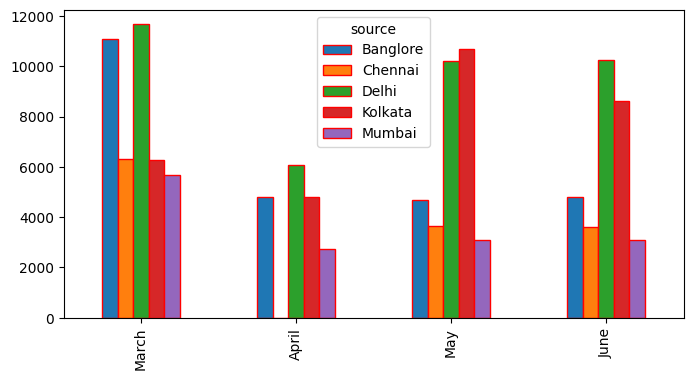

In [60]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])
    .price.median()
    .unstack(fill_value=0)
    .set_axis(["March", "April", "May", "June"])
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="red"
    )
)

## dep_time

In [61]:
train["dep_time"]

0      2024-08-16 08:55:00
1      2024-08-16 17:30:00
2      2024-08-16 11:40:00
3      2024-08-16 09:25:00
4      2024-08-16 22:55:00
               ...        
6690   2024-08-16 10:45:00
6691   2024-08-16 09:25:00
6692   2024-08-16 14:00:00
6693   2024-08-16 07:55:00
6694   2024-08-16 11:50:00
Name: dep_time, Length: 6694, dtype: datetime64[ns]

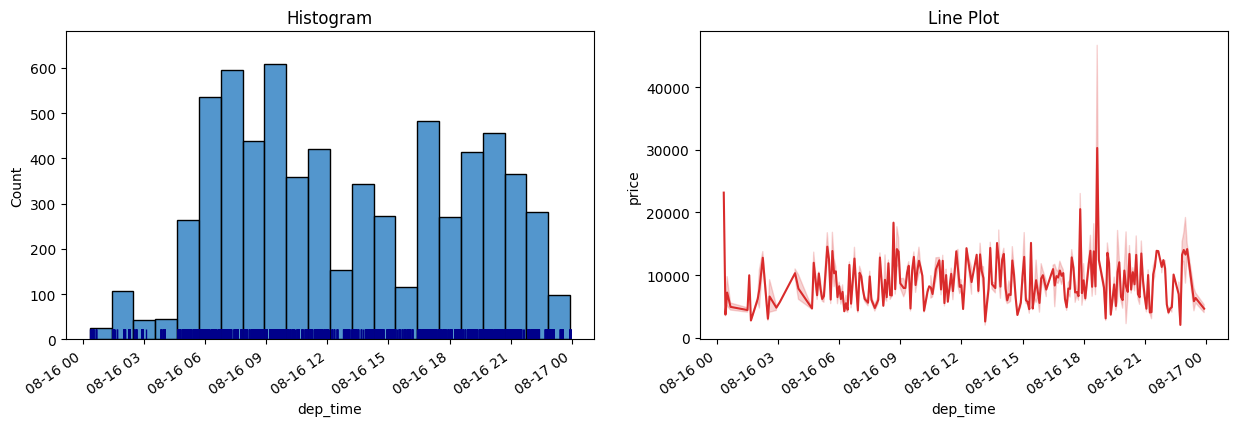

In [62]:
dt_univar_plots(train, "dep_time","price")

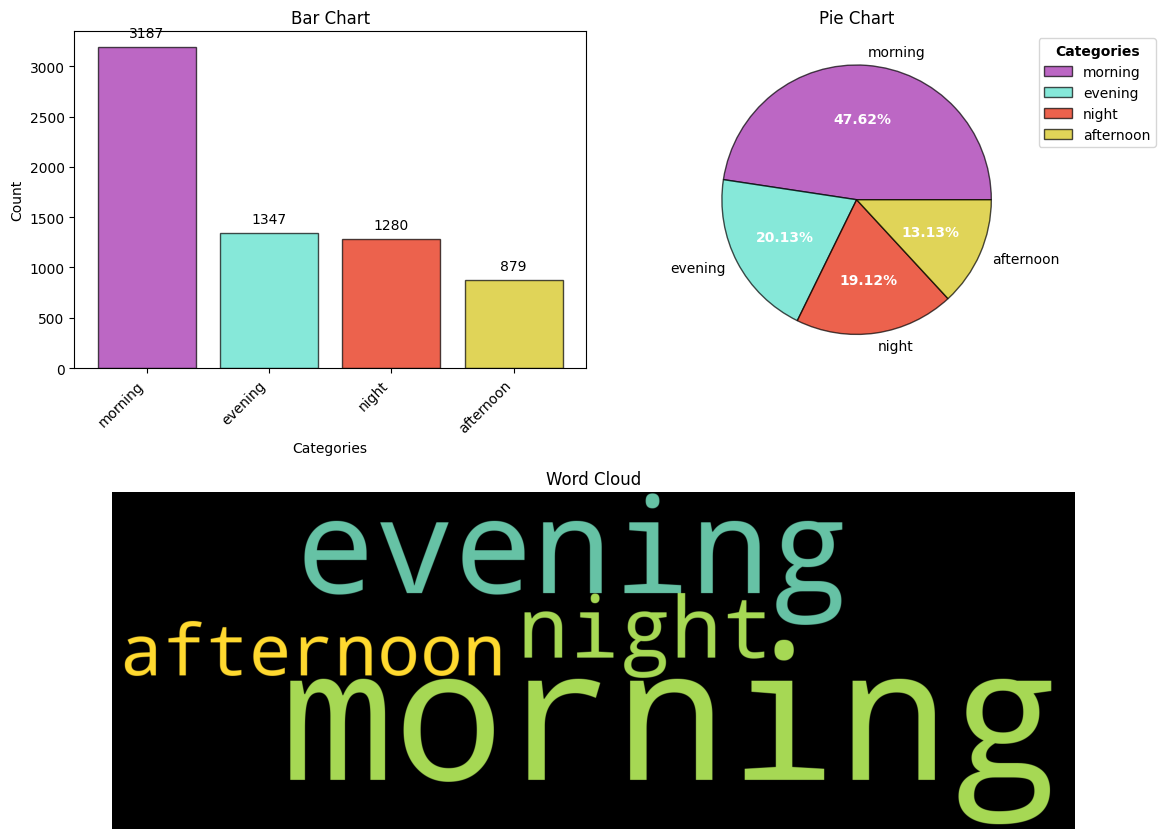

In [69]:
(
    train
    .assign(dep_time=lambda df_: pd.Series(np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                                 df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                                 df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                                ["morning","afternoon","evening"],
                                default="night")))
    .pipe(cat_univar_plots,"dep_time")
)

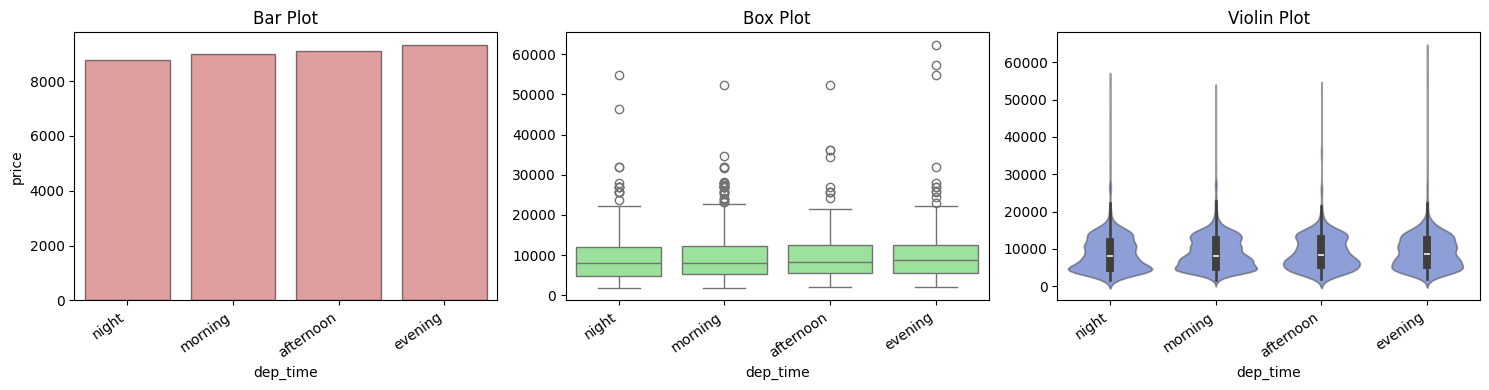

In [70]:
(
    train
    .assign(dep_time=lambda df_: pd.Series(np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                                 df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                                 df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                                ["morning","afternoon","evening"],
                                default="night")))
    .pipe(num_cat_bivar_plots,"price","dep_time")
)

## durations

In [72]:
train.duration

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6694, dtype: int64

In [73]:
def num_summary(data, var):
  import warnings
  warnings.filterwarnings("ignore")

  # title
  col = data.loc[:, var].copy()
  display_html(size=2, content=var)

  # quick glance
  display_html(3, "Quick Glance:")
  display(col)

  # meta-data
  display_html(3, "Meta-data:")
  print(f"{'Data Type':15}: {col.dtype}")
  print(f"{'Missing Data':15}: {col.isna().sum():,} rows ({col.isna().mean() * 100:.2f} %)")
  print(f"{'Available Data':15}: {col.count():,} / {len(col):,} rows")

  # quantiles
  display_html(3, "Percentiles:")
  display(
      col
      .quantile([0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0])
      .rename(index=lambda val: f"{val * 100:.0f}")
      .rename("value")
      .rename_axis(index="percentile")
      .to_frame()
  )

  # central tendancy
  display_html(3, "Central Tendancy:")
  display(
      pd
      .Series({"mean": col.mean(),
               "trimmed mean (5%)": stats.trim_mean(col.values, 0.05),
               "trimmed mean (10%)": stats.trim_mean(col.values, 0.1),
               "median": col.median()})
      .rename("value")
      .to_frame()
  )

  # spread
  display_html(3, "Measure of Spread:")
  std = col.std()
  iqr = col.quantile(0.75) - col.quantile(0.25)
  display(
      pd
      .Series({
          "var": col.var(),
          "std": std,
          "IQR": iqr,
          "mad": stats.median_abs_deviation(col.dropna()),
          "coef_variance": std / col.mean()
      })
      .rename("value")
      .to_frame()
  )

  # skewness and kurtosis
  display_html(3, "Skewness and Kurtosis:")
  display(
      pd
      .Series({
          "skewness": col.skew(),
          "kurtosis": col.kurtosis()
      })
      .rename("value")
      .to_frame()
  )

  alpha = 0.05
  # test for normality
  display_html(3, "Hypothesis Testing for Normality:")
  # shapiro-wilk test
  display_html(4, "Shapiro-Wilk Test:")
  sw_test = stats.shapiro(col.dropna().values)
  sw_statistic = sw_test.statistic
  sw_pvalue = sw_test.pvalue
  print(f"{'Significance Level':21}: {alpha}")
  print(f"{'Null Hypothesis':21}: The data is normally distributed")
  print(f"{'Alternate Hypothesis':21}: The data is not normally distributed")
  print(f"{'p-value':21}: {sw_pvalue}")
  print(f"{'Test Statistic':21}: {sw_statistic}")
  if sw_pvalue < alpha:
    print(f"- Since p-value is less than alpha ({alpha}), we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is not normally distributed")
  else:
    print(f"- Since p-value is greater than alpha ({alpha}), we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is normally distributed")

  #anderson-darling test
  display_html(4, "Anderson-Darling Test:")
  ad_test = stats.anderson(col.dropna().values, dist="norm")
  ad_statistic = ad_test.statistic
  ad_critical = ad_test.critical_values[2]
  print(f"{'Significance Level':21}: {alpha}")
  print(f"{'Null Hypothesis':21}: The data is normally distributed")
  print(f"{'Alternate Hypothesis':21}: The data is not normally distributed")
  print(f"{'Critical Value':21}: {ad_critical}")
  print(f"{'Test Statistic':21}: {ad_statistic}")
  if ad_statistic >= ad_critical:
    print(f"- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is not normally distributed")
  else:
    print(f"- Since the Test-statistic is less than Critical Value, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print("- CONCLUSION: We conclude that the data sample is normally distributed")


In [74]:
num_summary(train,"duration")

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6694, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,510.00
75,920.00
90,1440.00
95,1601.75
99,1855.00


,value
mean,633.371676
trimmed mean (5%),599.575174
trimmed mean (10%),570.895258
median,510.000000


,value
var,252960.712875
std,502.951999
IQR,750.000000
mad,340.000000
coef_variance,0.794087


,value
skewness,0.894131
kurtosis,-0.052204


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8865419626235962
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.45769626661695
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [77]:
from sklearn.preprocessing import (
    PowerTransformer,
    OneHotEncoder,
    StandardScaler
)

In [78]:
def num_univar_plots(data, var, bins=10, figsize=(15, 7)):
  display_html(2, f"Univariate Analysis of {var}")
  display_html(content="")
  col = data.loc[:, var].copy()

  fig, axes = plt.subplots(2, 3, figsize=figsize)
  axes = axes.ravel()

  #histogram
  sns.histplot(
      data,
      x=var,
      bins=bins,
      kde=True,
      color="#1973bd",
      ax=axes[0],
  )
  sns.rugplot(
      data,
      x=var,
      color="black",
      height=0.035,
      ax=axes[0]
  )
  axes[0].set(title="Histogram")

  # cdf
  sns.ecdfplot(
      data,
      x=var,
      ax=axes[1],
      color="red"
  )
  axes[1].set(title="CDF")

  # power transform
  data = data.assign(**{
      f"{var}_pwt": (
          PowerTransformer()
          .fit_transform(data.loc[:, [var]])
          .ravel()
      )
  })
  sns.kdeplot(
      data,
      x=f"{var}_pwt",
      fill=True,
      color="#f2b02c",
      ax=axes[2]
  )
  sns.rugplot(
      data,
      x=f"{var}_pwt",
      color="black",
      height=0.035,
      ax=axes[2]
  )
  axes[2].set(title="Power Transformed")

  # box plot
  sns.boxplot(
      data,
      x=var,
      color="#4cd138",
      ax=axes[3]
  )
  axes[3].set(title="Box Plot")

  # violin plot
  sns.violinplot(
      data,
      x=var,
      color="#ed68b4",
      ax=axes[4]
  )
  axes[4].set(title="Violin Plot")

  # qq plot
  sm.qqplot(
      col.dropna(),
      line="45",
      fit=True,
      ax=axes[5]
  )
  axes[5].set(title="QQ Plot")

  plt.tight_layout()
  plt.show()


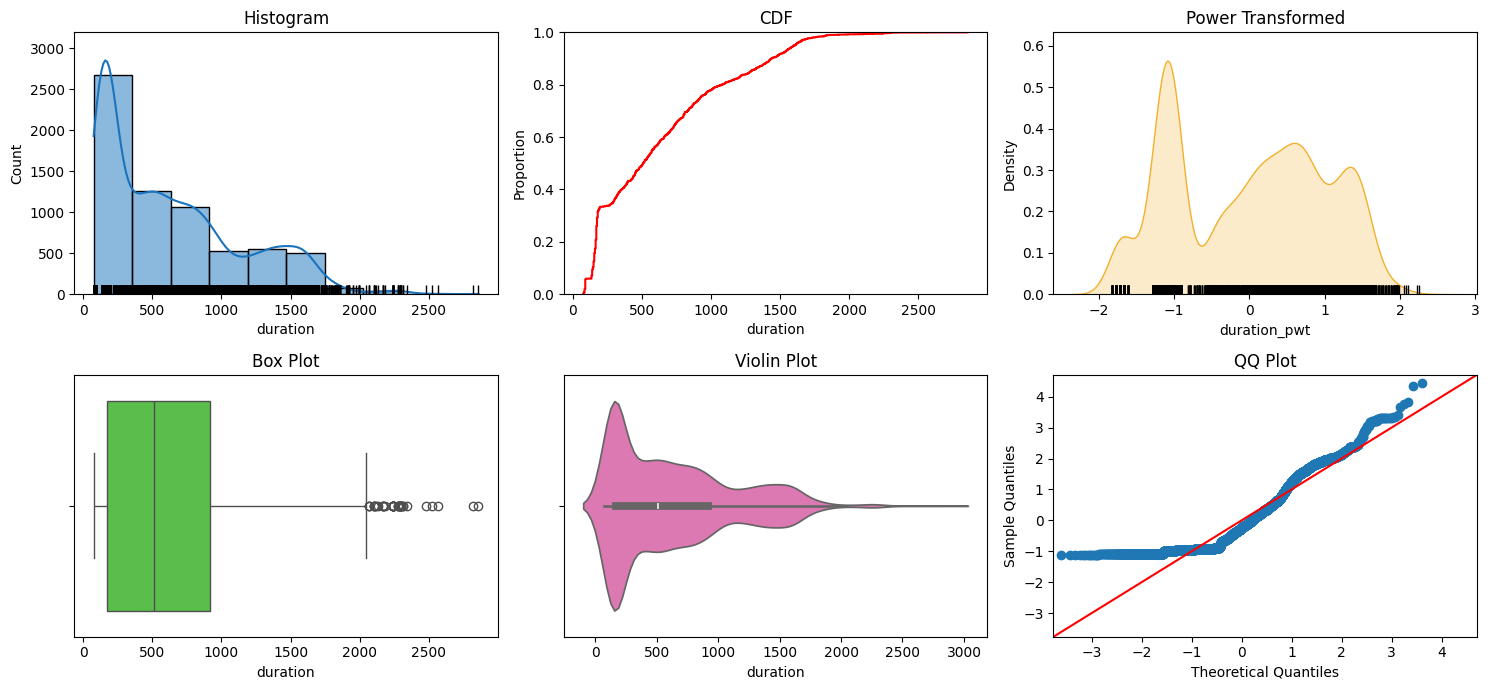

In [79]:
num_univar_plots(train,"duration")

In [80]:
def num_bivar_plots(data, var_x, var_y, figsize=(12, 4.5), scatter_kwargs=dict(), hexbin_kwargs=dict()):
  display_html(2, f"Bi-variate Analysis between {var_x} and {var_y}")
  display_html(content="")

  fig, axes = plt.subplots(1, 2, figsize=figsize)

  # scatter plot
  sns.scatterplot(
      data,
      x=var_x,
      y=var_y,
      ax=axes[0],
      edgecolors="black",
      **scatter_kwargs
  )
  axes[0].set(title="Scatter Plot")

  # hexbin plot
  col_x = data.loc[:, var_x]
  col_y = data.loc[:, var_y]
  hexbin = axes[1].hexbin(
      x=col_x,
      y=col_y,
      **hexbin_kwargs
  )
  axes[1].set(
      title="Hexbin Plot",
      xlabel=var_x,
      xlim=(col_x.min(), col_x.max()),
      ylim=(col_y.min(), col_y.max())
  )
  cb = plt.colorbar(
      hexbin,
      label="Count"
  )

  plt.tight_layout()
  plt.show()


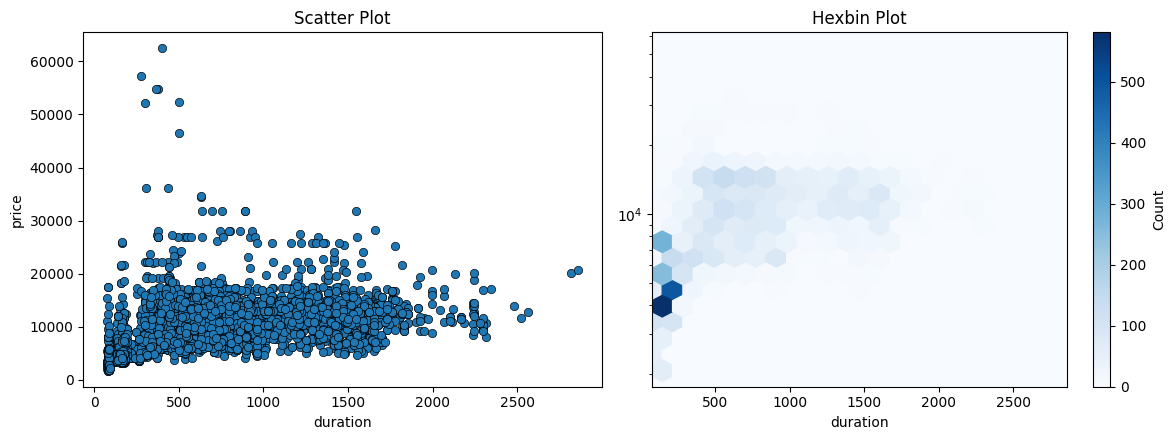

In [84]:
num_bivar_plots(train,"duration","price",hexbin_kwargs=dict(yscale="log",gridsize=20,cmap="Blues"))

In [85]:
def num_num_hyp_testing(data, var1, var2, alpha=0.05):
  display_html(2, f"Hypothesis Test for Association between {var1} and {var2}")

  temp = (
      data
      .dropna(subset=[var1, var2], how="any")
      .copy()
  )

  # pearson test
  pearson = stats.pearsonr(temp[var1].values, temp[var2].values)
  pvalue = pearson.pvalue
  statistic = pearson.statistic
  display_html(3, "Pearson Test")
  print(f"- {'Significance Level':21}: {alpha * 100}%")
  print(f"- {'Null Hypothesis':21}: The samples are uncorrelated")
  print(f"- {'Alternate Hypothesis':21}: The samples are correlated")
  print(f"- {'Test Statistic':21}: {statistic}")
  print(f"- {'p-value':21}: {pvalue}")
  if pvalue < alpha:
    print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {var1} and {var2} are correlated")
  else:
    print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {var1} and {var2} are uncorrelated")

  # spearman test
  spearman = stats.spearmanr(temp[var1].values, temp[var2].values)
  pvalue = spearman.pvalue
  statistic = spearman.statistic
  display_html(3, "Spearman Test")
  print(f"- {'Significance Level':21}: {alpha * 100}%")
  print(f"- {'Null Hypothesis':21}: The samples are uncorrelated")
  print(f"- {'Alternate Hypothesis':21}: The samples are correlated")
  print(f"- {'Test Statistic':21}: {statistic}")
  print(f"- {'p-value':21}: {pvalue}")
  if pvalue < alpha:
    print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {var1} and {var2} are correlated")
  else:
    print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
    print(f"- CONCLUSION: The variables {var1} and {var2} are uncorrelated")



In [86]:
num_num_hyp_testing(train,"duration","price")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5091878071906593
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6980000420004596
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


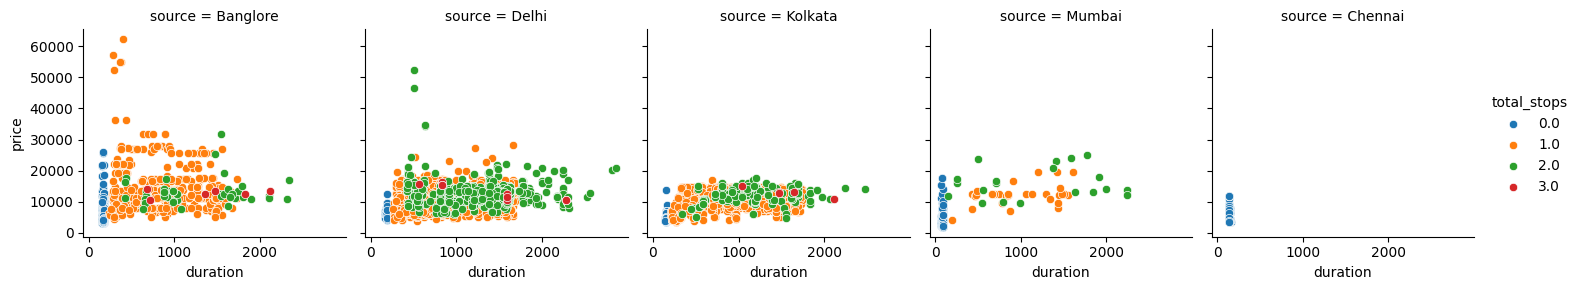

In [91]:
duration_grid=sns.FacetGrid(
    data=train,
    col="source",
    hue='total_stops',
    sharey=True
)
duration_grid.map(sns.scatterplot,"duration","price")
duration_grid.add_legend()

# Automated EDA

In [92]:
from ydata_profiling import ProfileReport

In [93]:
report = ProfileReport(train)
report.to_file(output_file="output.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 238.71it/s]


In [94]:
def get_iqr_outliers(data, var, band=1.5):
    q1, q3 = (
      data
      .loc[:, var]
      .quantile([0.25, 0.75])
      .values
    )

    iqr = q3 - q1
    lower_limit = q1 - (band * iqr)
    upper_limit = q3 + (band * iqr)

    display_html(3, f"{var} - IQR Limits:")
    print(f"{'Lower Limit':12}: {lower_limit}")
    print(f"{'Upper Limit':12}: {upper_limit}")

    return (
      data
      .query(f"{var} > @upper_limit | {var} < @lower_limit")
      .sort_values(var)
    )



In [95]:
get_iqr_outliers(train,"duration")

Lower Limit : -955.0
Upper Limit : 2045.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
3690,Air India,2019-05-01,Kolkata,Banglore,2024-08-16 05:50:00,2024-08-16 16:15:00,2065,2.0,No Info,10991
6079,Jet Airways,2019-03-06,Delhi,Cochin,2024-08-16 17:55:00,2024-08-16 04:25:00,2070,2.0,No Info,17072
3225,Jet Airways,2019-03-06,Delhi,Cochin,2024-08-16 17:55:00,2024-08-16 04:25:00,2070,2.0,In-flight meal not included,15812
2990,Air India,2019-03-03,Banglore,New Delhi,2024-08-16 11:05:00,2024-08-16 22:10:00,2105,2.0,No Info,11791
4589,Air India,2019-03-18,Banglore,New Delhi,2024-08-16 11:05:00,2024-08-16 22:10:00,2105,2.0,No Info,11161
1517,Air India,2019-03-03,Banglore,New Delhi,2024-08-16 11:05:00,2024-08-16 22:10:00,2105,2.0,No Info,11948
2916,Air India,2019-05-12,Kolkata,Banglore,2024-08-16 12:00:00,2024-08-16 23:15:00,2115,3.0,No Info,10991
2170,Air India,2019-03-12,Banglore,New Delhi,2024-08-16 06:45:00,2024-08-16 18:05:00,2120,3.0,No Info,13387
1105,Jet Airways,2019-03-06,Delhi,Cochin,2024-08-16 16:50:00,2024-08-16 04:25:00,2135,2.0,No Info,19907
4000,Air India,2019-03-06,Delhi,Cochin,2024-08-16 07:05:00,2024-08-16 19:15:00,2170,2.0,No Info,11552
